KNN CLASSIFICATION

In [181]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary


In [214]:
df=pd.read_csv('seattle_airbnb.csv')
df.shape #the original data rows and columns

(7497, 18)

In [274]:
knn_df = df[['city', 'price', 'latitude', 'longitude']]

In [275]:
knn_df.columns

Index(['city', 'price', 'latitude', 'longitude'], dtype='object')

In [276]:
knn_df.isnull().sum()

city         0
price        0
latitude     0
longitude    0
dtype: int64

In [277]:
neighbor_df = knn_df.dropna()

In [278]:
neighbor_df.head()

,city,price,latitude,longitude
0,"Seattle, WA, United States",250,47.610819,-122.290816
1,"Seattle, WA, United States",100,47.529846,-122.275840
2,"Seattle, WA, United States",82,47.687801,-122.313427
3,"Seattle, WA, United States",49,47.523980,-122.359891
4,"Seattle, WA, United States",90,47.654109,-122.337605


In [279]:
neighbor_df.shape

(7497, 4)

In [280]:
neighbor_df.head()

,city,price,latitude,longitude
0,"Seattle, WA, United States",250,47.610819,-122.290816
1,"Seattle, WA, United States",100,47.529846,-122.275840
2,"Seattle, WA, United States",82,47.687801,-122.313427
3,"Seattle, WA, United States",49,47.523980,-122.359891
4,"Seattle, WA, United States",90,47.654109,-122.337605


In [281]:
trainData, validData = train_test_split(neighbor_df, test_size=0.4, random_state=1)
print(trainData.shape, validData.shape)

newHouse = pd.DataFrame([{'latitude': 46, 'longitude': -122.2}])
newHouse

(4498, 4) (2999, 4)


,latitude,longitude
0,46,-122.2


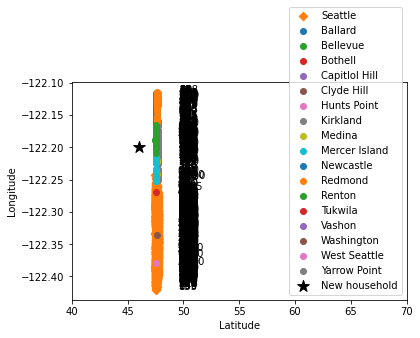

In [282]:
fig, ax = plt.subplots()

subset = trainData.loc[trainData['city']=='Seattle, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='D', label='Seattle', color='C1')

subset = trainData.loc[trainData['city']=='Ballard, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Ballard', color='C0')

subset = trainData.loc[trainData['city']=='Bellevue, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Bellevue', color='C2')

subset = trainData.loc[trainData['city']=='Bothell, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Bothell', color='C3')

subset = trainData.loc[trainData['city']=='Capitol Hill, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Capitlol Hill', color='C4')

subset = trainData.loc[trainData['city']=='Clyde Hill, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Clyde Hill', color='C5')

subset = trainData.loc[trainData['city']=='Hunts Point, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Hunts Point', color='C6')

subset = trainData.loc[trainData['city']=='Kirkland, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Kirkland', color='C7')

subset = trainData.loc[trainData['city']=='Medina, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Medina', color='C8')

subset = trainData.loc[trainData['city']=='Mercer Island, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Mercer Island', color='C9')

subset = trainData.loc[trainData['city']=='Newcastle, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Newcastle', color='C10')

subset = trainData.loc[trainData['city']=='Redmond, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Redmond', color='C11')

subset = trainData.loc[trainData['city']=='Renton, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Renton', color='C12')

subset = trainData.loc[trainData['city']=='Tukwila, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Tukwila', color='C13')

subset = trainData.loc[trainData['city']=='Vashon, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Vashon', color='C14')

subset = trainData.loc[trainData['city']=='Washington, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Washington', color='C15')

subset = trainData.loc[trainData['city']=='West Seattle, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='West Seattle', color='C16')

subset = trainData.loc[trainData['city']=='Yarrow Point, WA, United States']
ax.scatter(subset.latitude, subset.longitude, marker='o', label='Yarrow Point', color='C17')

ax.scatter(newHouse.latitude, newHouse.longitude, marker='*', label='New household', color='black', s=150)

plt.xlabel('Latitude')  # set x-axis label
plt.ylabel('Longitude')  # set y-axis label
for _, row in trainData.iterrows():
    ax.annotate(row.price, (row.latitude + 2, row.longitude))
    
handles, labels = ax.get_legend_handles_labels()
ax.set_xlim(40, 70)
ax.legend(handles, labels, loc=4)

plt.show()

In [283]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['latitude', 'longitude']])  # Note the use of an array of column names

# Transform the full dataset
seattleNorm = pd.concat([pd.DataFrame(scaler.transform(neighbor_df[['latitude', 'longitude']]), 
                                    columns=['Zlatitude', 'Zlongitude']),
                       neighbor_df[['city', 'price']]], axis=1)

#Then repartition into train and test using row indexs
trainNorm = seattleNorm.iloc[trainData.index]
validNorm = seattleNorm.iloc[validData.index]

#Transform newHouseHold record
newHouseholdNorm = pd.DataFrame(scaler.transform(newHouse), columns=['Zlatitude', 'Zlongitude'])
trainNorm.head()

,Zlatitude,Zlongitude,city,price
7049,1.318301,0.123631,"Seattle, WA, United States",80
1037,-0.347657,0.102239,"Seattle, WA, United States",250
471,0.743139,0.014618,"Seattle, WA, United States",89
4053,-2.397865,2.495305,"Renton, WA, United States",39
6479,1.372278,-0.718755,"Seattle, WA, United States",45


In [284]:
train_X = trainNorm[['Zlatitude', 'Zlongitude']]
train_y = trainNorm['city']
valid_X = validNorm[['Zlatitude', 'Zlongitude']]
valid_y = validNorm['city']

# Train a classifier for different values of k (1-14)
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        #test performance on validation set
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.994665
1    2  0.995332
2    3  0.994998
3    4  0.995665
4    5  0.995999
5    6  0.995665
6    7  0.995665
7    8  0.995665
8    9  0.994998
9   10  0.994998
10  11  0.994665
11  12  0.994331
12  13  0.993998
13  14  0.994331


In [286]:
seattle_X = seattleNorm[['Zlatitude', 'Zlongitude']]
seattle_y = seattleNorm['city']
knn = KNeighborsClassifier(n_neighbors=4).fit(seattle_X, seattle_y)
distances, indices = knn.kneighbors(newHouseholdNorm)
#Predict ownership for newHouseholdNorm
print(knn.predict(newHouse))
print('Distances',distances)
print('Indices', indices)
print(seattleNorm.iloc[indices[0], :])

['Seattle, WA, United States']
Distances [[32.447944   32.4537368  32.45562003 32.45572955]]
Indices [[6124 2619 2289 2337]]
      Zlatitude  Zlongitude                        city  price
6124  -2.504228    2.158448   Renton, WA, United States     60
2619  -2.507261    2.747438   Renton, WA, United States     50
2289  -2.505755    1.170381  Seattle, WA, United States    230
2337  -2.504034    1.239002  Seattle, WA, United States    119


C:\Users\ggonz\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


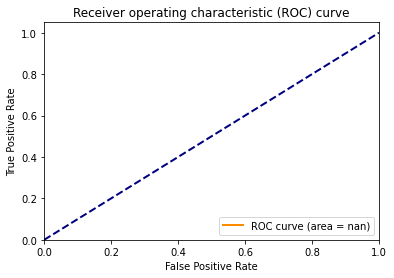

In [287]:
from sklearn.metrics import roc_curve, auc

#Train on training set
knn = KNeighborsClassifier(n_neighbors=4).fit(train_X, train_y)

#valid_y is in the form (Owner, Nonowner). We have to convert it to (1, 0)
valid_y_binary = valid_y.apply(lambda x: 1 if x=='Owner' else 0)

#get probability of belonging to each class
y_scores = knn.predict_proba(valid_X)
#get false positive rate and true positive rate values 
fpr, tpr, threshold = roc_curve(valid_y_binary, y_scores[:, 1])

roc_auc = auc(fpr, tpr) # area under the curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') #naive rule
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()